In [0]:
import pandas as pd
import numpy as np
import io, os, sys
import tensorflow as tf
from subprocess import check_output
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
!kill -9 -1

In [0]:
!pip install -U -q PyDrive

In [0]:
zip_id = 'your save zip file id in google drive' 

### How to have zip Id:

click share in the zip file and from the shareable link pick the value of id


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

In [0]:
# 1. Authenticate and create the PyDrive client.

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

if not os.path.exists('MODEL'):
  os.makedirs('MODEL')

In [7]:
# DOWNLOAD ZIP

print ("Downloading zip file")
myzip = drive.CreateFile({'id': zip_id})
myzip.GetContentFile('model.zip')

In [8]:
# UNZIP ZIP
print ("Uncompressing zip file")
zip_ref = zipfile.ZipFile('model.zip', 'r')
zip_ref.extractall('MODEL/')
zip_ref.close()

Uncompressing zip file


In [9]:
!ls

adc.json  MODEL  model.zip  sample_data


In [0]:
folder = '/content/MODEL'
#print(check_output(["ls", folder]).decode("utf8"))

In [11]:
# select only png file from the directory
onlyfiles = [f for f in os.listdir(folder) if f.endswith (".png")]
onlyfiles = [x for x in sorted(onlyfiles)] # because in csv file the file column is osrted.. to aconvert both featuer value and target we adjust it
input_numpy_array = np.zeros((len(onlyfiles), 150, 150, 3)) # most pictures are in 150*150*3 shape
print("Working with {0} images".format(len(onlyfiles)))
print(onlyfiles)


Working with 2184 images
['0_0_001.png', '0_0_002.png', '0_0_003.png', '0_0_004.png', '0_0_005.png', '0_0_006.png', '0_0_007.png', '0_0_008.png', '0_0_009.png', '0_0_010.png', '0_0_011.png', '0_0_012.png', '0_0_013.png', '0_0_014.png', '0_0_015.png', '0_0_016.png', '0_0_017.png', '0_0_018.png', '0_0_019.png', '0_0_020.png', '0_0_021.png', '0_0_022.png', '0_0_023.png', '0_0_024.png', '0_0_025.png', '0_0_026.png', '0_0_027.png', '0_0_028.png', '0_0_029.png', '0_0_030.png', '0_0_031.png', '0_0_032.png', '0_0_033.png', '0_0_034.png', '0_0_035.png', '0_0_036.png', '0_0_037.png', '0_0_038.png', '0_0_039.png', '0_0_040.png', '0_0_041.png', '0_0_042.png', '0_0_043.png', '0_0_044.png', '0_0_045.png', '0_0_046.png', '0_0_047.png', '0_0_048.png', '0_0_049.png', '0_0_050.png', '0_0_051.png', '0_0_052.png', '0_0_053.png', '0_0_054.png', '0_0_055.png', '0_0_056.png', '0_0_057.png', '0_0_058.png', '0_0_059.png', '0_0_060.png', '0_0_061.png', '0_0_062.png', '0_0_063.png', '0_0_064.png', '0_0_065.png',

In [0]:
not_listed = [] # storage which are not in 150*150*3 shape; not a good idea but only 5 files are here and hence the
                # project is for learning phase that's why files which are in different shape is deleted!
for i in range(len(onlyfiles)):
  file_selected = folder + '/' + onlyfiles[i]
  image_data = mpimg.imread(file_selected)
  if image_data.shape[0] == 150: # some image have different shape; not an ideal way to handle
    image_data = np.delete(image_data, 3, axis=2) # if axis = 2 means it indicates 3rd dimension i.e in (150,150,3) the value is 3
    input_numpy_array[i, :, :, :] = image_data
  else:
    not_listed.append(i)

In [13]:
for i in range(len(not_listed)):
    print(onlyfiles[not_listed[i]])
    print(mpimg.imread(folder + '/' + onlyfiles[not_listed[i]]).shape)

4_6_071.png
(280, 280, 4)
5_4_010.png
(239, 239, 4)
5_4_011.png
(338, 338, 4)
5_4_012.png
(242, 242, 4)
5_4_013.png
(225, 225, 4)


upload the csv file styles.csv. 

In [15]:
from google.colab import files
uploaded = files.upload() 

Saving style.csv to style (1).csv


In [16]:
input_df = pd.read_csv(io.StringIO(uploaded['style.csv'].decode('utf-8')))
print('shape of input df: {shape}'.format(shape= input_df.shape ))

shape of input df: (2184, 5)


In [17]:
print('total unique product name {0}, \nUnique Product names {1}'.format(np.unique(input_df.product_name).shape[0], np.unique(input_df.product_name)))


total unique product name 10, 
Unique Product names ['boots' 'bracelet' 'earrings' 'handbag' 'lipstick' 'nail polish'
 'necklace' 'ring' 'shoes' 'watches']


In [18]:
print('shape of input df: {shape}'.format(shape= input_df.shape ))
print ('**' * 50)
print('different type of products {products}'.format(products= np.unique(input_df.product_name)))
print ('**' * 50)
print('total number of boots {boots}'.format(boots = input_df[input_df.product_name == 'boots'].shape[0]))
print ('**' * 50)
print('total number of bracelet {bracelet}'.format(bracelet = input_df[input_df.product_name == 'bracelet'].shape[0]))
print ('**' * 50)
print('total number of earrings {earrings}'.format(earrings = input_df[input_df.product_name == 'earrings'].shape[0]))
print ('**' * 50)
print('total number of handbag {handbag}'.format(handbag = input_df[input_df.product_name == 'handbag'].shape[0]))
print ('**' * 50)
print('total number of lipstick {lipstick}'.format(lipstick = input_df[input_df.product_name == 'lipstick'].shape[0]))
print ('**' * 50)
print('total number of nail_polish {nail_polish}'.format(nail_polish = input_df[input_df.product_name == 'nail polish'].shape[0]))
print ('**' * 50)
print('total number of necklace {necklace}'.format(necklace = input_df[input_df.product_name == 'necklace'].shape[0]))
print ('**' * 50)
print('total number of ring {ring}'.format(ring = input_df[input_df.product_name == 'ring'].shape[0]))
print ('**' * 50)
print('total number of shoes {shoes}'.format(shoes = input_df[input_df.product_name == 'shoes'].shape[0]))
print ('**' * 50)
print('total number of watches {watches}'.format(watches = input_df[input_df.product_name == 'watches'].shape[0]))

shape of input df: (2184, 5)
****************************************************************************************************
different type of products ['boots' 'bracelet' 'earrings' 'handbag' 'lipstick' 'nail polish'
 'necklace' 'ring' 'shoes' 'watches']
****************************************************************************************************
total number of boots 158
****************************************************************************************************
total number of bracelet 121
****************************************************************************************************
total number of earrings 164
****************************************************************************************************
total number of handbag 419
****************************************************************************************************
total number of lipstick 228
*********************************************************************************************

In [0]:
input_df_del = input_df.drop(input_df[(input_df.file == '5_4_011.png') | 
                                      (input_df.file == '5_4_010.png') |
                                      (input_df.file == '5_4_012.png') |
                                      (input_df.file == '5_4_013.png') |
                                      (input_df.file == '4_6_071.png')].index)

In [20]:
print ('shape of input df {0} \nshape of after delete {1}'.format(input_df.shape, input_df_del.shape))

shape of input df (2184, 5) 
shape of after delete (2179, 5)


In [21]:
print ('column names of the input data frame {0} '.format(input_df_del.columns.tolist()))

column names of the input data frame ['brand_name', 'brand_label', 'product_name', 'product_label', 'file'] 


In [22]:
product_name_target = np.zeros((input_df_del.shape[0],))
print ('product target shape is {0} \nproductlabel of dataframe shape is {1}'.format(product_name_target.shape, input_df_del.product_label.values.shape))
product_name_target = input_df_del.product_label.values
print (product_name_target)

product target shape is (2179,) 
productlabel of dataframe shape is (2179,)
[0 0 0 ... 9 9 9]


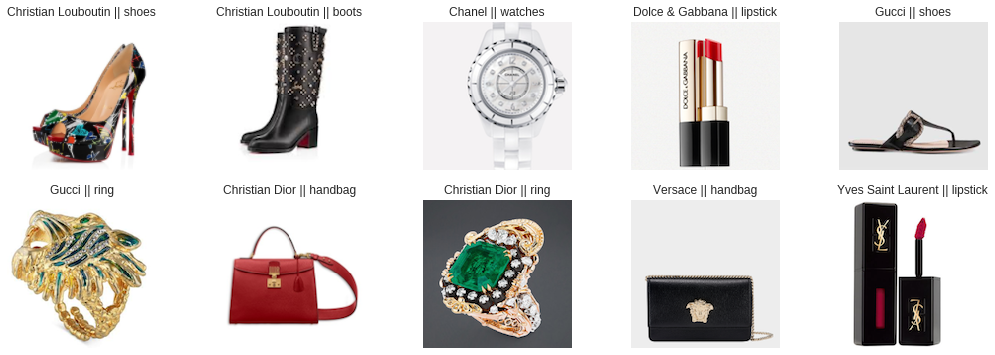

In [23]:
def display_images(img_path, ax):
  plt.axis("off")
  plt.imshow(mpimg.imread(folder + '/' +img_path))
  
fig = plt.figure(figsize=(18,6))

for i in range(10):
  ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[], title=input_df_del['brand_name'] [i*218] + ' || ' + input_df_del['product_name'][i*218])
  display_images(input_df_del['file'][i*218], ax)

In [24]:
print(input_numpy_array.shape)
input_numpy_array = np.delete(input_numpy_array, not_listed, 0)
print(input_numpy_array.shape)

(2184, 150, 150, 3)
(2179, 150, 150, 3)


In [25]:
input_numpy_array_normalize = input_numpy_array.astype('float32')/255
input_numpy_array_gray = np.dot(input_numpy_array_normalize[..., :3], [.299, 0.587, 0.114])
print (input_numpy_array_gray.shape)

(2179, 150, 150)


In [26]:
def splitDataset(inputData, inputLabelData):
  X_train, X_test, Y_train, Y_val = train_test_split(inputData, inputLabelData, test_size=0.2)
  return {"X_train": X_train, "X_test": X_test, "Y_train": Y_train, "Y_test": Y_val}

split_train_test = splitDataset(input_numpy_array_normalize, product_name_target)
train_feature_data = split_train_test['X_train']
train_target_data = split_train_test['Y_train']
test_feature_data = split_train_test['X_test']
test_target_data = split_train_test['Y_test']

print ('train feature data shape: {0} \
        \ntrain target data shape: {1} \
        \ntest feature data shape: {2} \
        \ntest test data shape: {3}'.format(train_feature_data.shape, train_target_data.shape, test_feature_data.shape, test_target_data.shape))

train feature data shape: (1743, 150, 150, 3)         
train target data shape: (1743,)         
test feature data shape: (436, 150, 150, 3)         
test test data shape: (436,)


In [27]:
print ('unique values for the train target {0} \
        \nunique values for the train target {1}'
      .format(np.unique(train_target_data), np.unique(test_target_data)))

unique values for the train target [0 1 2 3 4 5 6 7 8 9]         
unique values for the train target [0 1 2 3 4 5 6 7 8 9]


#Create CNN Model:


1.   Define the input layer: reshape (batch_size, width, height, channels)
2.   Create Convolutional layer # 1: *compute 32 filters using 5 * 5  filter with ReLU activation* 
      
  *   No. of filters: 32
  *   filter[width, height] = [5,5] if same can be written as kernel_size=5
  *   padding = same & valid : 
        * same when no of output length & width is equal to length & width of output; here padding is 1 means add 0 to every side of the matrix
        * valid when output's height & width reduces ::
          * To give it a general rule, if a matrix nxn is convolved with fxf filter/kernel give us n-f+1,n-f+1 matrix.
          *  reduces when filter/kernel size is f>1
          *  limitation: hence convolution operation took place multiple times therefore image shrinks involved huge possibility of information loss and in this method the edge pixel got the less concern 
   *   **use conv2d( ) method of tensorflow layer**
  *  Output tensorflow shape: [batch_size, height, weight, no.of filters]
  
3. Create Pool layer:

  *   create max pooling layer
    * if feature is detected anywhere then keep high number from the filter. 
    * has no parameters to learn
    * Example of Max pooling on 3D input:
        * Input: (4, 4, 10)
        * Max pooling size = 2 and stride =2
        * Output: (2,2,10)
        
  *   **use max_pooling2d( ) method of tensorflow layer**
    * input is here the output of convolutional layer # 1
  *  filter size: 2 * 2; that means height=width=2
  *  stride: 2
    * Stride tells the number of pixels we will jump when convolving filter/kernel
    *  general rule of finding the output of dimensions: (n+2p-f)/s + 1, (n+2p-f)/s +1 (floor of this)
  *  Alternative of max pooling is average value, however max pooling is used more. Instead of taking max value it takes from the filter it takes the average value
  
  
**Example: **

1 || 3 || 2 || 1

2 || 9 || 1 || 1

1 || 3 || 2 || 3

5 || 6 || 1 || 2

so in first case, if two filter (2, 2)  then from (1,3,2,9) 9 will be picked. if stride s = 2 then the next filter will be (2,1,1,1) then 2 will be the output and so on.

4.  **Convolutional Layer # 2 and Pooling Layer #2**
  *  For convolutional layer #2, we configure 64 5x5 filters with ReLU activation, and for pooling layer #2, we use the same specs as pooling layer #1 (a 2x2 max pooling filter with stride of 2):
  
        Here, for convolutional layer 2, the input data/tensor is the output of the pool1 where in pool2, the input of the input tensor is the output of the conv2 layer
  *  Convolutional Layer #2:
        * filter = 64
        * kernel_size = 5
        * padding = same
        * activation = relu
        * output:
            * shape= [batch_size, 14, 14, 64]
            * width, height same as output of pooling1 because, padding = same
            
  * Pool Layer #2:
        *  input = conv2
        *  output =  pool2
            * shape = [batch_size, 7, 7, 64] (50% reduction of height and width from conv2)
            
5. **Dense Layer**

  * Add dense layer:
    * no. of neurons = 1024
    * activation function = ReLU
    * feature extracted by the convolution/pooling layers
      * dense layer is added with feature extraction
    * Steps needed to add **Dense Layer**:
      * flatten the ouput of the last pool layer and make a shape [batch_size, features]
      * use tf.layers.dense
        * Inputs: flat of the last pool
        * units = no of neurons
        * activation = relu
     * Apply regularization method (dropout)to our dense layer
        *  input  for this is the output of dense layer
        * rate = 0.4% means 40% of the elements will be randomly dropped out during training
        
6. Logits Layer
  *  final layer in our neural network is the logits layer
  * create dense layer with 10 neurons 
    * 10 because length of unique product name is total 10 
  *  output = [batch_size, 10]
  
  
  








In [0]:
def create_convolution_layer(input_tensor, filter_size_val, kernel_size_val, padding_val):
  # Create Convolutional layer for the model 
  # Computes feature_number(parameter) features using a 5*5 filter with ReLU activation.
  # Padding is added to preserve width and height
  # Input Tensor Shape: [batch_size, height, width, no.of_channel]
  # Output Tensor Shape: [batch_size, height, width, feature_number(parameter)]
  return tf.layers.conv2d(
      inputs = input_tensor,
      filters = filter_size_val,
      kernel_size = kernel_size_val,
      padding = padding_val,
      activation = tf.nn.relu
      )

In [0]:
def create_pool_layer(input_tensor, pool_size_val, stride_val):
  # Create max Pooling Layer for the model 
  # Arguments:
  #    input_tensor: input of the pool layer shape::(batch_size, height, width, no_of_dimension_output_from_conv_layer)
  #    pool_size_val: given filter to do filtering  
  #    stride_val: jump value after doing striding
  # Return:
  #    Output Tensor Shape: [batch_size, output_height, output_width, no_of_dimension_output_from_conv_layer]
  return tf.layers.max_pooling2d(
      inputs=input_tensor, 
      pool_size=pool_size_val, 
      strides=stride_val)

In [0]:
def create_dense_layer(input_tensor, no_of_units):
  # Densely connected layer with given neurons
  # Arguments:
  #   input_tensor: output of the final pool layer ->  Shape: (batch_size, height * width * dimension]
  #   no_of_units: total number of neurons in the dense layer
  # Returns:  
  #   Output Tensor Shape: [batch_size, no_of_units]
  return tf.layers.dense(
      inputs= input_tensor, 
      units= no_of_units, 
      activation=tf.nn.relu)

In [0]:
def calc_predictions(logits):
  # Generate predictions (for PREDICT and EVAL mode)
  # Arguments:
  #   logits: logit layer return raw values for predictions
  #           shape: (batch_size, no_of_target_class) 
  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add 'softmax_tensor' to the graph. It is used for PREDICT and by the 'logging_hook'
      # name is given to the tensor to reference it later. 
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  return predictions

In [0]:
def compute_cost(labels, logits):
  # Calculate loss value to measure how closely the model's predictions match the target class
  # hence multiclass we will use cross entropy function
  # Arguments:
  #   labels: target value of the input dataset
  #   logits: predicted value of the input dataset
  # Returns:
  #   loss value 
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
  return loss

In [0]:
def optimize_model(learning_rate_val, loss_val):
  # optimize the loss value during training
  # use stochastic gradient descent algorithm as optimization algorithm
  # Arguments:
  #   learning_rate_val: how fast the model will run 
  #   loss_val: value determine how far the model is lacking behind from the actual target value
  optimizer = tf.train.AdamOptimizer(learning_rate= learning_rate_val)
  train_op = optimizer.minimize(
      loss= loss_val,
      global_step= tf.train.get_global_step())
  return train_op

In [0]:
def evaluate_metric(labels, predictions):
  # add accuracy metric of the model
  print ('type of predictions classes {0}'. format(type(predictions['classes'])))
  eval_metric_ops = {
      'accuracy': tf.metrics.accuracy(
        labels = labels,
        predictions = predictions['classes'])
  }
  return eval_metric_ops

In [0]:
def cnn_model_fn(features,labels, mode):
  input_layer = tf.reshape(features["x"], [-1,150,150,3])
  conv1 = create_convolution_layer(input_tensor= input_layer, filter_size_val= 32, kernel_size_val= [5,5], padding_val= "same")
  pool1 = create_pool_layer(input_tensor= conv1, pool_size_val= [2,2], stride_val= 2)
  conv2 = create_convolution_layer(input_tensor= pool1, filter_size_val= 64, kernel_size_val= [5,5], padding_val= "same")
  pool2 = create_pool_layer(input_tensor= conv2, pool_size_val= [2,2], stride_val= 2)
  pool2_flat = tf.reshape(pool2, [-1, pool2.shape[1] * pool2.shape[2] * pool2.shape[3]])
  dense = create_dense_layer(pool2_flat, no_of_units= 1024)
  dropout = tf.layers.dropout(inputs= dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
  logits = tf.layers.dense(inputs=dropout, units=10)
  predictions = calc_predictions(logits)
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions= predictions)
  loss = compute_cost(labels= labels, logits= logits)
  if mode == tf.estimator.ModeKeys.TRAIN:
    train_op = optimize_model(learning_rate_val=0.001, loss_val = loss)
    return tf.estimator.EstimatorSpec(mode= mode, loss=loss, train_op=train_op)
  eval_metric_ops = evaluate_metric(labels = labels, predictions = predictions)
  return tf.estimator.EstimatorSpec(mode= mode, loss=loss, eval_metric_ops=eval_metric_ops)

# TF estimator

Advantage: faster to run, to implement. simpler and well supported

### How it works:
1. Define the estimator
2. Data loading with estimators and datasets
3. Defining prediction, training and evaluation modes


In [36]:
product_label_classifier = tf.estimator.Estimator(model_fn= cnn_model_fn, model_dir= "/tmp/product_label_convnet_model")

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_global_id_in_cluster': 0, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f486978b110>, '_model_dir': '/tmp/product_label_convnet_model', '_protocol': None, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_experimental_distribute': None, '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_eval_distribute': None, '_train_distribute': None, '_master': ''}


In [0]:
# Set up logging for Predictions
# Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=1)

In [38]:
print('type of train feature data {0} \
      \ntype of train target data {1} \
      \ntype of test feature data {2} \
      \ntype of test target data {3}'.
      format(type(train_feature_data),
             type(train_target_data),
             type(test_feature_data),
             type(test_target_data)))

type of train feature data <type 'numpy.ndarray'>       
type of train target data <type 'numpy.ndarray'>       
type of test feature data <type 'numpy.ndarray'>       
type of test target data <type 'numpy.ndarray'>


In [0]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
  x = {"x": train_feature_data},
  y = train_target_data,
  batch_size = 64,
  num_epochs = None,
  shuffle = True)

In [40]:
train_results = product_label_classifier.train(
  input_fn = train_input_fn,
  steps = 500,
  hooks=[logging_hook])

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/product_label_convnet_model/model.ckpt.
INFO:tensorflow:probabilities = [[0.10004343 0.100123   0.09997146 0.09995491 0.10014179 0.1000458
  0.09987585 0.09986012 0.1000018  0.09998186]
 [0.10006048 0.10013904 0.09993066 0.09987459 0.09998576 0.0999441
  0.09998408 0.10002428 0.10000379 0.10005321]
 [0.09999667 0.10021342 0.09989391 0.099999   0.10005477 0.09991691
  0.09992766 0.09993711 0.09995685 0.10010369]
 [0.10005458 0.1001057  0.09989149 0.09998181 0.

In [0]:
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": test_feature_data},
    y = test_target_data,
    num_epochs=1,
    shuffle=False)

In [42]:
eval_results = product_label_classifier.evaluate(input_fn= eval_input_fn)
print(eval_results)

INFO:tensorflow:Calling model_fn.
type of predictions classes <class 'tensorflow.python.framework.ops.Tensor'>
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-05-12:51:03
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/product_label_convnet_model/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-10-05-12:51:19
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.63761467, global_step = 500, loss = 1.1285218
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: /tmp/product_label_convnet_model/model.ckpt-500
{'loss': 1.1285218, 'global_step': 500, 'accuracy': 0.63761467}
